# AIN 214 - PA1 - FALL 2023

BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE AN UNDERSTANDABLE AND TRACBLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED YO COMMENT ON YOUR RESULTS OR EPXLAIN YOUR REASONING. ALSO, PLEASE DO NO HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT, REPORTING IS A KEY STEP IN DATA SCIENCE.

Deadline: 03.11.2023 (23:59:59)

Submission: Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/


# Necessary Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlite3 import connect
import sqlite3

# Notes:
* Use pandas dataframe (df) to load the data. 
* Use numpy or pandas operations for the requested tasks unless otherwise specified. Use of naive for loops is not considered valid.
* For the db operations, use sqlite3 library in Python

# 1st Set of Questions on Boston Housing Dataset **(30 Pts)**

* Retrieved from KAGGLE
* **Dataset Path: "Data/BostonHousing.csv"**

## Q1. Basic Data Exploration **(10 Pts)**
1. Load the data into Pandas DataFrame and print the column names. **(1 pts)**
2. Display the first and last 10 rows of the dataset. **(1 pts)**
3. Display random 10 rows. **(1 pts)**
4. Display random 10 rows with a seed, ie, it outputs the same random rows everytime it is run. **(1 pts)**
5. Display every 15th row. **(1 pts)**
6. Get the summary stats of the dataset regarding each column. **(2 pts)**
7. Identify and count the number of missing values in each column. **(3 pts)**

In [2]:
df = pd.read_csv("Data/BostonHousing.csv")
df.columns
# Load the data into Pandas DataFrame and print the column names

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [3]:
df.head(10)
# Display the first and last 10 rows of the dataset.

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [4]:
df.tail(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
df.sample(10)
# Display the random 10 rows

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
319,0.47547,0.0,9.90,0,0.544,6.113,58.8,4.0019,4,304,18.4,396.23,12.73,21.0
94,0.04294,28.0,15.04,0,0.464,6.249,77.3,3.6150,4,270,18.2,396.90,10.59,20.6
163,1.51902,0.0,19.58,1,0.605,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
239,0.09252,30.0,4.93,0,0.428,6.606,42.2,6.1899,6,300,16.6,383.78,7.37,23.3
314,0.36920,0.0,9.90,0,0.544,6.567,87.3,3.6023,4,304,18.4,395.69,9.28,23.8
288,0.04590,52.5,5.32,0,0.405,6.315,45.6,7.3172,6,293,16.6,396.90,7.60,22.3
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27,16.1
268,0.54050,20.0,3.97,0,0.575,7.470,52.6,2.8720,5,264,13.0,390.30,3.16,43.5
366,3.69695,0.0,18.10,0,0.718,4.963,91.4,1.7523,24,666,20.2,316.03,14.00,21.9
310,2.63548,0.0,9.90,0,0.544,4.973,37.8,2.5194,4,304,18.4,350.45,12.64,16.1


In [6]:
df.sample(10,random_state=0)
# sample using seed

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
329,0.06724,0.0,3.24,0,0.460,6.333,17.2,5.2146,4,430,16.9,375.21,7.34,22.6
371,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
403,24.80170,0.0,18.10,0,0.693,5.349,96.0,1.7028,24,666,20.2,396.90,19.77,8.3
78,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398,18.7,386.40,12.34,21.2
15,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9
487,4.83567,0.0,18.10,0,0.583,5.905,53.2,3.1523,24,666,20.2,388.22,11.45,20.6
340,0.06151,0.0,5.19,0,0.515,5.968,58.5,4.8122,5,224,20.2,396.90,9.29,18.7
310,2.63548,0.0,9.90,0,0.544,4.973,37.8,2.5194,4,304,18.4,350.45,12.64,16.1
102,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6


In [7]:
df.iloc[::15]
# Display every 15th row

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
15,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9
30,1.13081,0.0,8.14,0,0.538,5.713,94.1,4.2330,4,307,21.0,360.17,22.60,12.7
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21,19.3
60,0.14932,25.0,5.13,0,0.453,5.741,66.2,7.2254,8,284,19.7,395.11,13.15,18.7
75,0.09512,0.0,12.83,0,0.437,6.286,45.0,4.5026,5,398,18.7,383.23,8.94,21.4
90,0.04684,0.0,3.41,0,0.489,6.417,66.1,3.0923,2,270,17.8,392.18,8.81,22.6
105,0.13262,0.0,8.56,0,0.520,5.851,96.7,2.1069,5,384,20.9,394.05,16.47,19.5
120,0.06899,0.0,25.65,0,0.581,5.870,69.7,2.2577,2,188,19.1,389.15,14.37,22.0
135,0.55778,0.0,21.89,0,0.624,6.335,98.2,2.1107,4,437,21.2,394.67,16.96,18.1


In [8]:
df.describe()
# Get the summary stats of the dataset regarding each column

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
df.isna().sum()
# Identify and count the number of missing values in each column

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

## Q2. Data Filtering (10 pts)

1. Extract records where the rm (average number of rooms per dwelling) >= 7.   **(2 pts)**
2. Extract records located along the Charles River (chas = 1) and have a crime rate (crim) less than the median crime rate of the dataset.  **(2 pts)**
3. Identify neighborhoods where the average rm is greater than 6, the lstat (% lower status of the population) is below 10, and the medv is above the 75th percentile of the dataset. This would give neighborhoods with relatively larger homes, lower "lower-status" population percentage, and higher median values.  **(2 pts)**
4. Identify records where the dis (weighted distances to five Boston employment centers) is in the top 10% of the dataset and the nox (nitric oxides concentration) is in the bottom 10%, indicating neighborhoods that are farther from employment centers and have cleaner air.  **(2 pts)**
5. From the houses built before 1940 (AGE column), select those which fall in the top 20% in terms of nitric oxide concentrations (NOX). From this subset, retrieve the bottom 10 records with the lowest MEDV values.  **(2 pts)**

In [10]:
df[df.rm>=7]
# Extract records where the rm >= 7

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
2,0.02729,0.0,7.07,0,0.4690,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
40,0.03359,75.0,2.95,0,0.4280,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9
55,0.01311,90.0,1.22,0,0.4030,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
64,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,3.47428,0.0,18.10,1,0.7180,8.780,82.9,1.9047,24,666,20.2,354.55,5.29,21.9
370,6.53876,0.0,18.10,1,0.6310,7.016,97.5,1.2024,24,666,20.2,392.05,2.96,50.0
375,19.60910,0.0,18.10,0,0.6710,7.313,97.9,1.3163,24,666,20.2,396.90,13.44,15.0
453,8.24809,0.0,18.10,0,0.7130,7.393,99.3,2.4527,24,666,20.2,375.87,16.74,17.8


In [11]:
median_crime = df.crim.median()
df[(df.chas==1)&(df.crim<median_crime)]
# Extract records located along the Charles River (chas = 1) and have a crime rate (crim) less than the median crime rate of the dataset.

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
208,0.13587,0.0,10.59,1,0.4890,6.064,59.1,4.2392,4,277,18.6,381.32,14.66,24.4
210,0.17446,0.0,10.59,1,0.4890,5.960,92.1,3.8771,4,277,18.6,393.25,17.27,21.7
212,0.21719,0.0,10.59,1,0.4890,5.807,53.8,3.6526,4,277,18.6,390.94,16.03,22.4
216,0.04560,0.0,13.89,1,0.5500,5.888,56.0,3.1121,5,276,16.4,392.80,13.51,23.3
218,0.11069,0.0,13.89,1,0.5500,5.951,93.8,2.8893,5,276,16.4,396.90,17.92,21.5
219,0.11425,0.0,13.89,1,0.5500,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
269,0.09065,20.0,6.96,1,0.4640,5.920,61.5,3.9175,3,223,18.6,391.34,13.65,20.7
273,0.22188,20.0,6.96,1,0.4640,7.691,51.8,4.3665,3,223,18.6,390.77,6.58,35.2
274,0.05644,40.0,6.41,1,0.4470,6.758,32.9,4.0776,4,254,17.6,396.90,3.53,32.4
276,0.10469,40.0,6.41,1,0.4470,7.267,49.0,4.7872,4,254,17.6,389.25,6.05,33.2


In [12]:
percentile = df.medv.quantile(0.75)
percentile
df[(df.rm>6)&(df.lstat<10)&(df.medv>percentile)]
# Identify neighborhoods where the average rm is greater than 6, the lstat (% lower status of the population) is below 10, and the medv is above 
# the 75th percentile of the dataset. 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
39,0.02763,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,252,18.3,395.63,4.32,30.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6
353,0.01709,90.0,2.02,0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,30.1
369,5.66998,0.0,18.10,1,0.631,6.683,96.8,1.3567,24,666,20.2,375.33,3.73,50.0
370,6.53876,0.0,18.10,1,0.631,7.016,97.5,1.2024,24,666,20.2,392.05,2.96,50.0


In [13]:
top_ten=df.dis.quantile(0.90)
bottom_ten=df.nox.quantile(0.10)
df[(df.dis>top_ten)&(df.nox<bottom_ten)]
# Identify records where the dis (weighted distances to five Boston employment centers) is in the top 10% of the dataset and the nox 
# (nitric oxides concentration) is in the bottom 10%

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
54,0.01360,75.0,4.00,0,0.4100,5.888,47.6,7.3197,3,469,21.1,396.90,14.80,18.9
55,0.01311,90.0,1.22,0,0.4030,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
56,0.02055,85.0,0.74,0,0.4100,6.383,35.7,9.1876,2,313,17.3,396.90,5.77,24.7
57,0.01432,100.0,1.32,0,0.4110,6.816,40.5,8.3248,5,256,15.1,392.90,3.95,31.6
64,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0
196,0.04011,80.0,1.52,0,0.4040,7.287,34.1,7.3090,2,329,12.6,396.90,4.08,33.3
197,0.04666,80.0,1.52,0,0.4040,7.107,36.6,7.3090,2,329,12.6,354.31,8.61,30.3
198,0.03768,80.0,1.52,0,0.4040,7.274,38.3,7.3090,2,329,12.6,392.20,6.62,34.6
199,0.03150,95.0,1.47,0,0.4030,6.975,15.3,7.6534,3,402,17.0,396.90,4.56,34.9
200,0.01778,95.0,1.47,0,0.4030,7.135,13.9,7.6534,3,402,17.0,384.30,4.45,32.9


In [14]:
house_age_condition=df.age>83
subset=df[(house_age_condition)]
top_twenty=subset.nox.quantile(0.80)
subset=subset[(subset.nox>top_twenty)]
subset.sort_values(by='medv').head(10)

# From the houses built before 1940 (age column), select those which fall in the top 20% in terms of nitric oxide concentrations (nox). From this subset,
# retrieve the bottom 10 records with the lowest medv values.

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
438,13.67810,0.0,18.10,0,0.740,5.935,87.9,1.8206,24,666,20.2,68.95,34.02,8.4
437,15.17720,0.0,18.10,0,0.740,6.152,100.0,1.9142,24,666,20.2,9.32,26.45,8.7
436,14.42080,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666,20.2,27.49,18.05,9.6
440,22.05110,0.0,18.10,0,0.740,5.818,92.4,1.8662,24,666,20.2,391.45,22.11,10.5
444,12.80230,0.0,18.10,0,0.740,5.854,96.6,1.8956,24,666,20.2,240.52,23.79,10.8
445,10.67180,0.0,18.10,0,0.740,6.459,94.8,1.9879,24,666,20.2,43.06,23.98,11.8
144,2.77974,0.0,19.58,0,0.871,4.903,97.8,1.3459,5,403,14.7,396.90,29.29,11.8
447,9.92485,0.0,18.10,0,0.740,6.251,96.6,2.1980,24,666,20.2,388.52,16.44,12.6
439,9.39063,0.0,18.10,0,0.740,5.627,93.9,1.8172,24,666,20.2,396.90,22.88,12.8
156,2.44668,0.0,19.58,0,0.871,5.272,94.0,1.7364,5,403,14.7,88.63,16.14,13.1


## Q3. Calculate the average per capita crime rate (crim) for each category, "Low", "Medium" or "High" of pupil-teacher ratio (ptratio). **(10 Pts)**
The ptratio is categorized into
* Low if ptratio <= 15
* Medium if 15 < ptratio <= 20
* High if ptratio > 20

In [15]:
low = df[df.ptratio<=15]
medium = df[(df.ptratio)>15 &(df.ptratio<=20)]
high = df[(df.ptratio)>20]
low_average = low['crim'].mean()
medium_average = medium['crim'].mean()
high_average=high['crim'].mean()
low_average,medium_average,high_average
#  Calculate the average per capita crime rate (crim) for each category, "Low", "Medium" or "High" of pupil-teacher ratio (ptratio)
# We understand that higher pratio means higher crime rate. So we need more teachers :)

(1.2355291379310345, 3.613523557312254, 8.545539850746268)

# 2nd Set of Questions on the shot1.csv and shot2.csv Datasets **(30 Pts)**

* **Dataset Path: "Data/shot1.csv" and "Data/shot2.csv"**

## Q1. Data Merging and Consistency Checking **(10 Pts)**

* Combine the data from "shot1.csv" and "shot2.csv" into a single DataFrame, ensuring no redundant columns are present. Merge by the redundant column names, representing the same info with different naming.
*  After merging, perform a consistency check for any duplicated rows and provide a summary of your findings. Give the details (avg, mean, etc) of each feature.

In [16]:
shot_df1=pd.read_csv("Data/shot1.csv")
shot_df2=pd.read_csv("Data/shot2.csv")
# read csv s into dfs 

In [17]:
# I analyzed the data and realized that the two data sets have 3 similar column 
# but only one of the columns had different names so I renamed it and ensured
# that there are no redundant columns.
shot_df2=shot_df2.rename(columns={'GAME_IDENTIFICATION':'GAME_ID'})
shot_merged = pd.merge(shot_df1, shot_df2, on=[ 'GAME_ID','SHOT_DIST', 'SHOT_RESULT'])
# merge dfs, removing redundant columns

In [18]:
shot_merged=shot_merged.drop_duplicates()
shot_merged.describe()
# check for duplicate rows and provide a summary of the findings for each feature

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.747530e+05,174753.000000,174753.000000,174753.000000,167349.000000,174753.000000,174753.000000,174753.000000,174753.000000,174753.000000,174753.000000,174753.000000,174753.000000,174753.000000
mean,2.140045e+07,0.213496,6.527825,2.475122,12.567087,1.956544,2.700657,13.653505,2.290839,158910.239166,4.170358,0.447197,0.986924,157527.022214
std,2.567926e+02,13.150768,4.725423,1.140989,5.776279,3.438927,3.003756,9.073395,0.454151,78825.178909,2.814585,0.497205,1.130234,79198.232583
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140024e+07,-8.000000,3.000000,1.000000,8.300000,0.000000,0.800000,4.400000,2.000000,101187.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.400000,0.000000,1.500000,14.000000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.800000,2.000000,3.600000,23.000000,3.000000,203078.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


## Q2. Player’s Shooting Accuracy Analysis **(10 Pts)**
* Using the combined DataFrame from Question 1, calculate and display the shooting accuracy of each player. 
* Shooting accuracy = the ratio of successful shots (SHOT_RESULT) to total shots taken
* Display the top 5 players based on shooting accuracy

In [19]:
shooting_accuracy = shot_merged.groupby('player_name')['SHOT_RESULT'].apply(lambda x: (x == 'made').mean())

In [20]:
top_5_players = shooting_accuracy.sort_values(ascending=False).head(5)
top_5_players

player_name
deandre jordan    0.737548
tyson chandler    0.687631
rudy gobert       0.647959
greg smith        0.647059
james johnson     0.626478
Name: SHOT_RESULT, dtype: float64

## Q3. Analyze the Relationship between shooting distance (SHOT_DIST) and shooting success (SHOT_RESULT). **(10 Pts)**
* Bin the shots into categories based on distance. **STATE AND REASON ABOUT YOUR LOGIC HERE!** (How to apply binning)
* Calculate the shooting accuracy for each bin. 
* **COMMENT** on your findinds.

In [21]:
# I choose this binning because the values were ranging between 0-47 and 10 bins seemed enough 
bins = list(range(0, 51, 5))  
labels = [f"{i}-{i+5}" for i in range(0, 50, 5)]  
shot_merged['SHOT_DIST_BIN'] = pd.cut(shot_merged['SHOT_DIST'], bins=bins, labels=labels, include_lowest=True)
bins

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [22]:
shooting_accuracy_by_bin = shot_merged.groupby('SHOT_DIST_BIN')['SHOT_RESULT'].apply(lambda x: (x == 'made').mean()).reset_index()

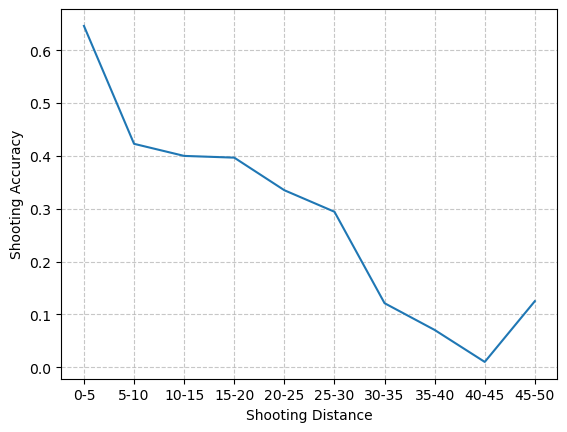

In [23]:
sns.lineplot(data=shooting_accuracy_by_bin,x='SHOT_DIST_BIN',y='SHOT_RESULT')
plt.xlabel('Shooting Distance')
plt.ylabel('Shooting Accuracy')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
# From the plot below we understand that shooting distance and shooting accuracy has inverse proportion
# Further the shooting distance means lower shooting accuracy

# 3rd Set of Questions on SQL - **using sqlite3 library!** **(40 Pts)**

* **Dataset Path: "Data/annots.csv"**

Here you are given a file: annots.csv, with the protein - gene ontology (GO) term associations/annotations. Gene ontology is a framework, representing the properties of genes and proteins. This is basically a Graph - more spesifically a directed acyclic graph (DAG), representing a level-ordered hierarchy with three subgraphs: MF, CC, and BP. Here, **each** node in the graph, which we term as **"GO Term" corresponds to a function of a protein.**

* If protein is annotated with a GO Term, then the protein has the function represented by this GO Term. 
* A protein can be and most of the time is annotated with multiple GO terms, and vice versa. 

In the annots.csv file, we have the annotation data, where each row corresponds to a protein - GO term annotation with the following columns: ProteinID,ProtSeq, GO_ID, Sub_Graph, Level. ProteinID is the specifier of the protein and the ProtSeq is the aminoacid sequence of this protein. GO_ID, Sub_Graph, and Level are properties of a GO Term. 

**Now, we want to store this data in a relational database, with the following table schemas:**

## Table 1: GoTerms:

| Column   | Type    | Key        | Description                |
|----------|---------|------------|----------------------------|
| GoID     | TEXT    | PRIMARY KEY| Gene Ontology Identifier   |
| SubGraph | TEXT    |            | Subgraph Type (BP, MF, CC) |
| Level    | INTEGER |            | Ontology level             |


## Table 2: Proteins

| Column     | Type | Key        | Description                |
|------------|------|------------|----------------------------|
| ProteinID  | TEXT | PRIMARY KEY| Unique Protein Identifier  |
| ProtSeq  | TEXT | | Amino Acid Sequence |

## Table 3: Annotations

| Column    | Type | Key                       | Description               |
|-----------|------|---------------------------|---------------------------|
| GoID      | TEXT | PRIMARY KEY, FOREIGN KEY  | Gene Ontology Identifier  |
| ProteinID | TEXT | PRIMARY KEY, FOREIGN KEY  | Unique Protein Identifier |


## Q1. Read the csv file and create this DB  **(10 Pts)**

In [24]:
connection = sqlite3.connect('annots.db')
cursor = connection.cursor()
df = pd.read_csv("Data/annots.csv")
cursor.execute('''
    CREATE TABLE IF NOT EXISTS GoTerms (
        GoID TEXT PRIMARY KEY,
        SubGraph TEXT,
        Level INTEGER
    )
''')
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Proteins (
        ProteinID TEXT PRIMARY KEY,
        ProtSeq TEXT
    )
''')
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Annotations (
        GoID TEXT PRIMARY KEY,
        ProteinID TEXT,
        PRIMARY KEY (GoID, ProteinID),
        FOREIGN KEY (GoID) REFERENCES GoTerms(GoID),
        FOREIGN KEY (ProteinID) REFERENCES Proteins(ProteinID)
    )
''')
go_terms_df = df[['GO_ID', 'Sub_Graph', 'Level']]
proteins_df = df[['ProteinID','ProtSeq']]
annotations_df = df[['GO_ID','ProteinID']]
go_terms_df.to_sql('GoTerms', connection, if_exists='replace', index=False)
proteins_df.to_sql('Proteins', connection, if_exists='replace', index=False)
annotations_df.to_sql('Annotations', connection, if_exists='replace', index=False)

connection.commit()

display(pd.read_sql('''
SELECT *
FROM GoTerms
''', connection))
display(pd.read_sql('''
SELECT *
FROM Proteins
''', connection))
display(pd.read_sql('''
SELECT *
FROM Annotations
''', connection))

,GO_ID,Sub_Graph,Level
0,GO:0005488,MF,1
1,GO:0019814,CC,2
2,GO:0004499,MF,5
3,GO:0006629,BP,3
4,GO:0002250,BP,3
...,...,...,...
25539,GO:0008152,BP,1
25540,GO:0000322,CC,6
25541,GO:0010035,BP,3
25542,GO:0017171,MF,3


,ProteinID,ProtSeq
0,A0A0E4AZF8,VDDIQEKMNKELGCIKVTFPGADGQGEDACLKDIPVSLISTYFART...
1,A0A075B6K5,FDEAEHAHTYLRERIEVRLMTASESLMGERLGLMMGVCYEHFKGCG...
2,A0A097ZPG2,NCLLPFHFDGRQPFWTGADCMFAFLMCDYSGAMCECTGCHWPHQEG...
3,A0A097ZPD9,QFEGITCPMDPCRPCAWWIARYSYHWLPIHRGSECQGLYMKPPDYQ...
4,A0A0C4DH36,GNGGHVTILYAYGAMHRHQMVRCYHWVGVTRV
...,...,...
25539,A0A0D1DT68,QVCMHSTPIKQSKRKRNCLMFIFLAHPFVEHPFPIQG
25540,A0A075TR33,TKTWHEMRDKGLFRKFIIAKYIVIMYCEPNGQFHYQTKYGERHMQS...
25541,A0A0B7P9G0,FWEKPHYISMVHEYMQTDMMWDLTMVWDFLMRACWVEWLRYRSAYA...
25542,A0A024B7W1,EHNRHYMCESYNYRHGCSLGSYQMLGQYNAQGT


,GO_ID,ProteinID
0,GO:0005488,A0A0E4AZF8
1,GO:0019814,A0A075B6K5
2,GO:0004499,A0A097ZPG2
3,GO:0006629,A0A097ZPD9
4,GO:0002250,A0A0C4DH36
...,...,...
25539,GO:0008152,A0A0D1DT68
25540,GO:0000322,A0A075TR33
25541,GO:0010035,A0A0B7P9G0
25542,GO:0017171,A0A024B7W1


## Q2. Define a function to extract all GO terms associated with a given amino acid sequence (ProtSeq), ensuring that the GO terms satisfy the following criteria: they are annotated with at least 50 proteins in MF and CC subgraphs, and 100 proteins in the BP subgraph.. **(10 Pts)**

In [25]:
prot_seq = "WYTWADEAHAKNIVMCFRMHGEAYEKAAVYMNRSPEFMGCRADNNDEYDV" #  example protein sequence
# First I counted the occurences of the subgraphs CC MF and BP
def extract_go_terms(prot_seq, mf, cc, bp):
    cc_count = df[(df['Sub_Graph'] == 'CC') & (df['ProtSeq'] == prot_seq)].shape[0]
    mf_count = df[(df['Sub_Graph'] == 'MF') & (df['ProtSeq'] == prot_seq)].shape[0]
    bp_count = df[(df['Sub_Graph'] == 'BP') & (df['ProtSeq'] == prot_seq)].shape[0]
# Then I checked if they are suitable for the given criterias
    if cc_count >= cc and mf_count >= mf and bp_count >= bp:
        selected_data = df[(df['ProtSeq'] == prot_seq) & ((df['Sub_Graph'] == 'CC') | (df['Sub_Graph'] == 'MF') | (df['Sub_Graph'] == 'BP'))]
        go_terms = selected_data['GO_ID'].tolist()
        sub_graphs = selected_data['Sub_Graph'].tolist()
        levels = selected_data['Level'].tolist()
        return list(zip(go_terms, sub_graphs, levels))
    else:
        return []

selected_go_terms = extract_go_terms(prot_seq, 50, 50, 100)
print(selected_go_terms)


[]


## Q3. Print the averge number of annotations a GO terms has for each level in each subgraph (MF, CC, and BP) **(10 Pts)**

In [26]:
query = '''
SELECT
    GO_ID,
    Sub_Graph,
    Level,
    AVG(Count) AS AverageAnnotations
FROM (
    SELECT
        Sub_Graph,
        Level,
        GO_ID,
        COUNT(*) AS Count
    FROM GoTerms
    GROUP BY Sub_Graph, Level, GO_ID
) AS SubQuery
GROUP BY Sub_Graph, Level, GO_ID;

'''
display(pd.read_sql(query,connection))

,GO_ID,Sub_Graph,Level,AverageAnnotations
0,GO:0008150,BP,0,810.0
1,GO:0000003,BP,1,20.0
2,GO:0002376,BP,1,168.0
3,GO:0008152,BP,1,360.0
4,GO:0009987,BP,1,369.0
...,...,...,...,...
2833,GO:0019145,MF,7,2.0
2834,GO:0034005,MF,7,1.0
2835,GO:0042973,MF,7,1.0
2836,GO:0052834,MF,7,1.0


## Q4. Identify the ProteinID with the longest ProtSeq within the Proteins table. Modify its ProtSeq to half its original length by trimming the sequence, update the ProteinID to "trimmed", and display the updated ProteinID and ProtSeq with its GO Term annotations. **(10 Pts)**

In [27]:
query = '''
SELECT ProteinID,ProtSeq
FROM Proteins
ORDER BY LENGTH(ProtSeq) DESC
LIMIT 1;
'''
cursor.execute(query)
result = cursor.fetchall()
protein_id = result[0][0]
longest_prot_seq = result[0][1]
half_lenght = len(longest_prot_seq) //2
trimmed_prot_seq = longest_prot_seq[:half_lenght]
command = '''
UPDATE Proteins
SET ProteinID = ? , ProtSeq = ?
WHERE ProteinID = ? AND ProtSeq = ?;
'''
cursor.execute(command, ('trimmed', trimmed_prot_seq , protein_id , longest_prot_seq))
connection.commit()
results = []
results.append([protein_id,prot_seq])
print(['trimmed',trimmed_prot_seq]+extract_go_terms(longest_prot_seq, 0,0,0))

# find and trim the longest sequence, displaying the updated ProtID and ProtSeq, and its annotated GO Terms

['trimmed', 'PINRSTMFFSFSNYPAILTPAMYDIKGWIGGWLQN', ('GO:0051716', 'BP', 2)]


In [28]:
connection.close()

# PLAGIARISM
All work on assignments must be done individually. You are encouraged to discuss
the given assignments with your classmates, but these discussions should be carried out
in an abstract way. That is, discussions related to a particular solution to a specific prob-
lem (either in actual code or in pseudocode) will not be tolerated. In short, turning
in someone else’s work (including work available on the internet), in whole or in part, as
your own will be considered as a violation of academic integrity. Please note that the
former conditions also hold for the material attained using AI tools, including ChatGPT,
GitHub Copilot, etc.